In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble  import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error ,mean_absolute_error # 평균제곱오차
from sklearn import preprocessing 
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import cross_val_score
# from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import datetime as dt### Dataset 

### Dataset 

In [35]:
train_set = pd.read_csv('final_final_train_0913.csv' , index_col = 0 )

train_set['year'] = pd.to_datetime(train_set.base_date).dt.year
train_set['month'] = pd.to_datetime(train_set.base_date).dt.month
train_set['date'] = pd.to_datetime(train_set.base_date).dt.day

train_set = train_set[['year','month','date', 'emd_nm', 'em_g', 'total_pop', 'jeju_resd_pop',
       'card_use_amt', 'delivery_amt', 'market_amt', 'card_use_cnt',
       'delivery_cnt', 'market_cnt', 'visit_pop', 'work_pop',
       'youth_pop', 'total_frgn_pop']]   # em_cnt 빼보기
train_set.isna().sum()

year              0
month             0
date              0
emd_nm            0
em_g              0
total_pop         0
jeju_resd_pop     0
card_use_amt      0
delivery_amt      0
market_amt        0
card_use_cnt      0
delivery_cnt      0
market_cnt        0
visit_pop         0
work_pop          0
youth_pop         0
total_frgn_pop    0
dtype: int64

### preprocessing 

In [36]:
train_set

,year,month,date,emd_nm,em_g,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop
0,2018,1,1,전체,85755000,679922,535888.570169,3.786578e+09,20891720.0,1.602637e+09,108983.0,1057.0,40848.0,7.210523e+06,8.301891e+05,54466.952499,2215.223209
1,2018,1,2,전체,90217650,679922,534509.814556,3.406059e+09,15597155.0,1.286966e+09,107164.0,839.0,38738.0,6.761153e+06,1.368438e+06,53973.690842,2221.350506
2,2018,1,3,전체,80277600,679922,532472.061474,3.499232e+09,13453350.0,1.292679e+09,109765.0,728.0,38284.0,6.770127e+06,1.369782e+06,53705.165769,2172.085577
3,2018,1,4,전체,80138700,679922,514678.201983,3.329829e+09,14592029.0,1.215080e+09,107110.0,740.0,36878.0,6.993326e+06,1.351504e+06,53151.118467,2111.044522
4,2018,1,5,전체,75798600,679922,527383.565802,3.733755e+09,21105231.0,1.290936e+09,112064.0,1009.0,37686.0,6.825653e+06,1.317354e+06,53360.869746,2055.834760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50881,2021,6,30,표선면,1377450,12681,10137.380983,9.063287e+07,1855783.0,3.831039e+07,1336.0,75.0,423.0,1.614560e+05,2.405863e+04,914.664667,12.910869
50882,2021,6,30,한경면,973850,9495,7257.895822,4.526361e+07,697661.0,1.767975e+07,1286.0,40.0,423.0,1.041218e+05,1.633182e+04,608.427552,22.165953
50883,2021,6,30,한림읍,3298100,24462,20632.727912,1.301568e+08,5508665.0,4.207137e+07,3044.0,257.0,669.0,3.018026e+05,5.060204e+04,2064.041876,48.329788
50884,2021,6,30,화북동,3749600,24630,24117.268821,1.918163e+08,13370520.0,4.846083e+07,5644.0,644.0,1645.0,2.433203e+05,5.097469e+04,1810.431884,18.483512


- 읍면동 encoder

In [37]:
# 레이블 인코더 객체 저장
label_encoder = preprocessing.LabelEncoder()

#읍면동 컬럼 이노딩
train_set['emd_nm'] = label_encoder.fit_transform(train_set['emd_nm'])
train_set.head()

,year,month,date,emd_nm,em_g,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop
0,2018,1,1,31,85755000,679922,535888.570169,3.786578e+09,20891720.0,1.602637e+09,108983.0,1057.0,40848.0,7.210523e+06,8.301891e+05,54466.952499,2215.223209
1,2018,1,2,31,90217650,679922,534509.814556,3.406059e+09,15597155.0,1.286966e+09,107164.0,839.0,38738.0,6.761153e+06,1.368438e+06,53973.690842,2221.350506
2,2018,1,3,31,80277600,679922,532472.061474,3.499232e+09,13453350.0,1.292679e+09,109765.0,728.0,38284.0,6.770127e+06,1.369782e+06,53705.165769,2172.085577
3,2018,1,4,31,80138700,679922,514678.201983,3.329829e+09,14592029.0,1.215080e+09,107110.0,740.0,36878.0,6.993326e+06,1.351504e+06,53151.118467,2111.044522
4,2018,1,5,31,75798600,679922,527383.565802,3.733755e+09,21105231.0,1.290936e+09,112064.0,1009.0,37686.0,6.825653e+06,1.317354e+06,53360.869746,2055.834760


- 년,월,일 encoding 

In [38]:
#읍면동 컬럼 이노딩
train_set['year'] = label_encoder.fit_transform(train_set['year'])
train_set['month'] = label_encoder.fit_transform(train_set['month'])
train_set['month'] = label_encoder.fit_transform(train_set['month'])
train_set.head()

,year,month,date,emd_nm,em_g,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop
0,0,0,1,31,85755000,679922,535888.570169,3.786578e+09,20891720.0,1.602637e+09,108983.0,1057.0,40848.0,7.210523e+06,8.301891e+05,54466.952499,2215.223209
1,0,0,2,31,90217650,679922,534509.814556,3.406059e+09,15597155.0,1.286966e+09,107164.0,839.0,38738.0,6.761153e+06,1.368438e+06,53973.690842,2221.350506
2,0,0,3,31,80277600,679922,532472.061474,3.499232e+09,13453350.0,1.292679e+09,109765.0,728.0,38284.0,6.770127e+06,1.369782e+06,53705.165769,2172.085577
3,0,0,4,31,80138700,679922,514678.201983,3.329829e+09,14592029.0,1.215080e+09,107110.0,740.0,36878.0,6.993326e+06,1.351504e+06,53151.118467,2111.044522
4,0,0,5,31,75798600,679922,527383.565802,3.733755e+09,21105231.0,1.290936e+09,112064.0,1009.0,37686.0,6.825653e+06,1.317354e+06,53360.869746,2055.834760


<AxesSubplot:>

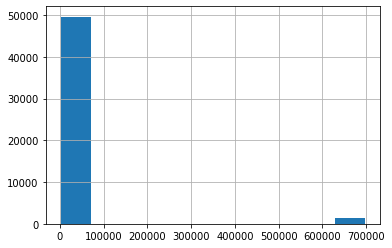

In [39]:
train_set.total_pop.hist()

- 이상치 제거

In [40]:
def outliers_iqr(data):
    q1,q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1-(iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

In [41]:
train_set.columns

Index(['year', 'month', 'date', 'emd_nm', 'em_g', 'total_pop', 'jeju_resd_pop',
       'card_use_amt', 'delivery_amt', 'market_amt', 'card_use_cnt',
       'delivery_cnt', 'market_cnt', 'visit_pop', 'work_pop', 'youth_pop',
       'total_frgn_pop'],
      dtype='object')

In [43]:
# features 이상치 처리
total_pop_outlier_index = outliers_iqr(train_set['total_pop'])[0]
jeju_resd_outlier_index = outliers_iqr(train_set['jeju_resd_pop'])[0]
card_use_outlier_index = outliers_iqr(train_set['card_use_amt'])[0]
delivery_amt_outlier_index = outliers_iqr(train_set['delivery_amt'])[0]
market_amt_outlier_index = outliers_iqr(train_set['market_amt'])[0]
card_use_cnt_outlier_index = outliers_iqr(train_set['card_use_cnt'])[0]
delivery_cnt_outlier_index = outliers_iqr(train_set['delivery_cnt'])[0]
market_cnt_outlier_index = outliers_iqr(train_set['market_cnt'])[0]
# em_cnt_outlier_index = outliers_iqr(train_set['em_cnt'])[0]
visit_pop_outlier_index = outliers_iqr(train_set['visit_pop'])[0]
work_pop_outlier_index = outliers_iqr(train_set['work_pop'])[0]
youth_pop_outlier_index = outliers_iqr(train_set['youth_pop'])[0]
total_frgn_pop_outlier_index = outliers_iqr(train_set['total_frgn_pop'])[0]

# target 이상치 처리
em_g_outlier_index = outliers_iqr(train_set['em_g'])[0]

In [44]:
# 이상치 index concat

lead_outlier_index = np.concatenate((total_pop_outlier_index,
                                     jeju_resd_outlier_index,
                                     card_use_outlier_index,
                                     delivery_amt_outlier_index,
                                     market_amt_outlier_index,
                                     card_use_cnt_outlier_index,
                                     delivery_cnt_outlier_index,
                                     market_cnt_outlier_index,
                                     #em_cnt_outlier_index,
                                     visit_pop_outlier_index,
                                     work_pop_outlier_index,
                                     youth_pop_outlier_index,
                                     total_frgn_pop_outlier_index,
                                     em_g_outlier_index), axis = None)

print(len(lead_outlier_index))
lead_outlier_index

67287


array([    0,     1,     2, ..., 50833, 50849, 50873], dtype=int64)

In [45]:
# 이상치가 아닌 index를 이용ㅎ애 leaad_not_outlier_index

lead_not_outlier_index = []

for i in train_set.index :
    if i not in lead_outlier_index:
        lead_not_outlier_index.append(i)

In [46]:
train_set_clean = train_set.loc[lead_not_outlier_index]
train_set_clean = train_set_clean.reset_index(drop=True)
train_set_clean

,year,month,date,emd_nm,em_g,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop
0,0,0,1,0,1708250,10028,7274.890502,61606900.0,54010.0,19891147.0,1806.0,5.0,589.0,191560.9036,19772.0910,967.851198,53.709367
1,0,0,1,2,1239600,19740,12143.821692,69402997.0,644192.0,24828201.0,1581.0,25.0,466.0,219588.8568,18744.1306,1163.849546,44.698131
2,0,0,1,4,1717700,13651,11185.575639,72541912.0,396728.0,37971731.0,2032.0,20.0,859.0,212778.5793,20177.9069,1353.922709,26.507865
3,0,0,1,5,1264950,22603,16075.181182,71630370.0,512113.0,37142481.0,1973.0,34.0,864.0,161422.7124,16536.3590,1122.494596,64.536289
4,0,0,1,6,1765600,13404,6460.308580,71667637.0,162030.0,39231391.0,2009.0,10.0,791.0,150882.4089,9403.9692,822.808829,26.525650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39672,3,5,30,36,1070950,3581,793.521616,25859784.0,2158373.0,7630208.0,668.0,80.0,257.0,51535.0961,1916.7451,227.689083,11.138588
39673,3,5,30,37,1377450,12681,10137.380983,90632868.0,1855783.0,38310391.0,1336.0,75.0,423.0,161456.0408,24058.6323,914.664667,12.910869
39674,3,5,30,38,973850,9495,7257.895822,45263612.0,697661.0,17679746.0,1286.0,40.0,423.0,104121.7986,16331.8170,608.427552,22.165953
39675,3,5,30,39,3298100,24462,20632.727912,130156819.0,5508665.0,42071373.0,3044.0,257.0,669.0,301802.6129,50602.0407,2064.041876,48.329788


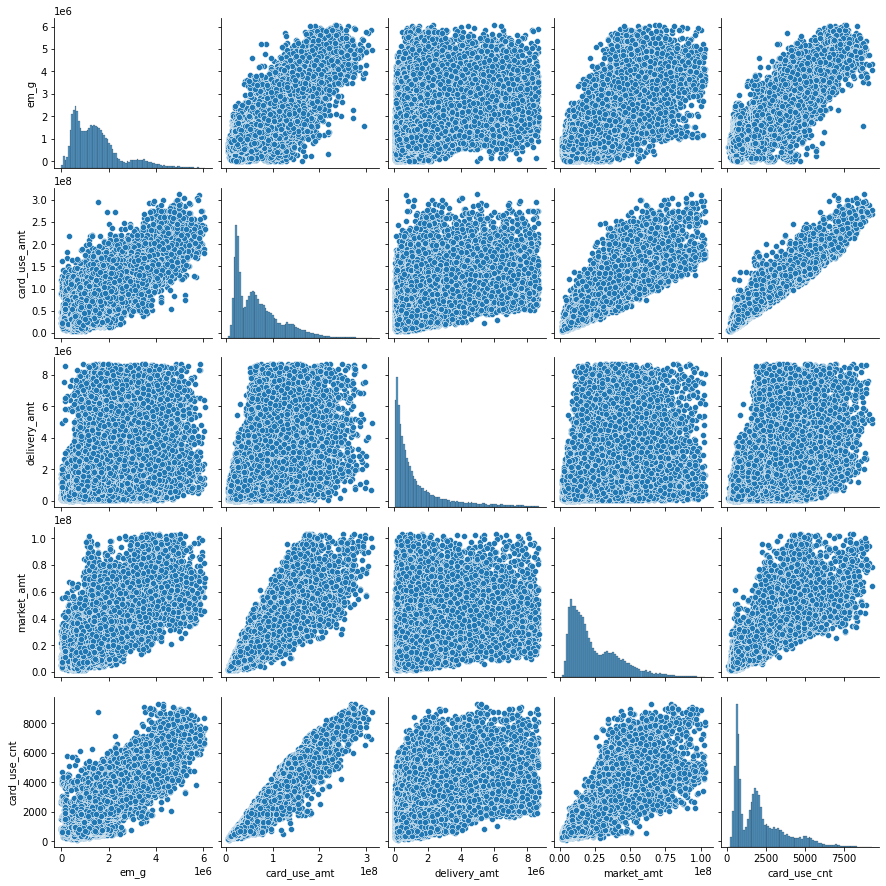

In [26]:
sns.pairplot(train_set_clean[['em_g','card_use_amt', 'delivery_amt', 'market_amt', 'card_use_cnt']])

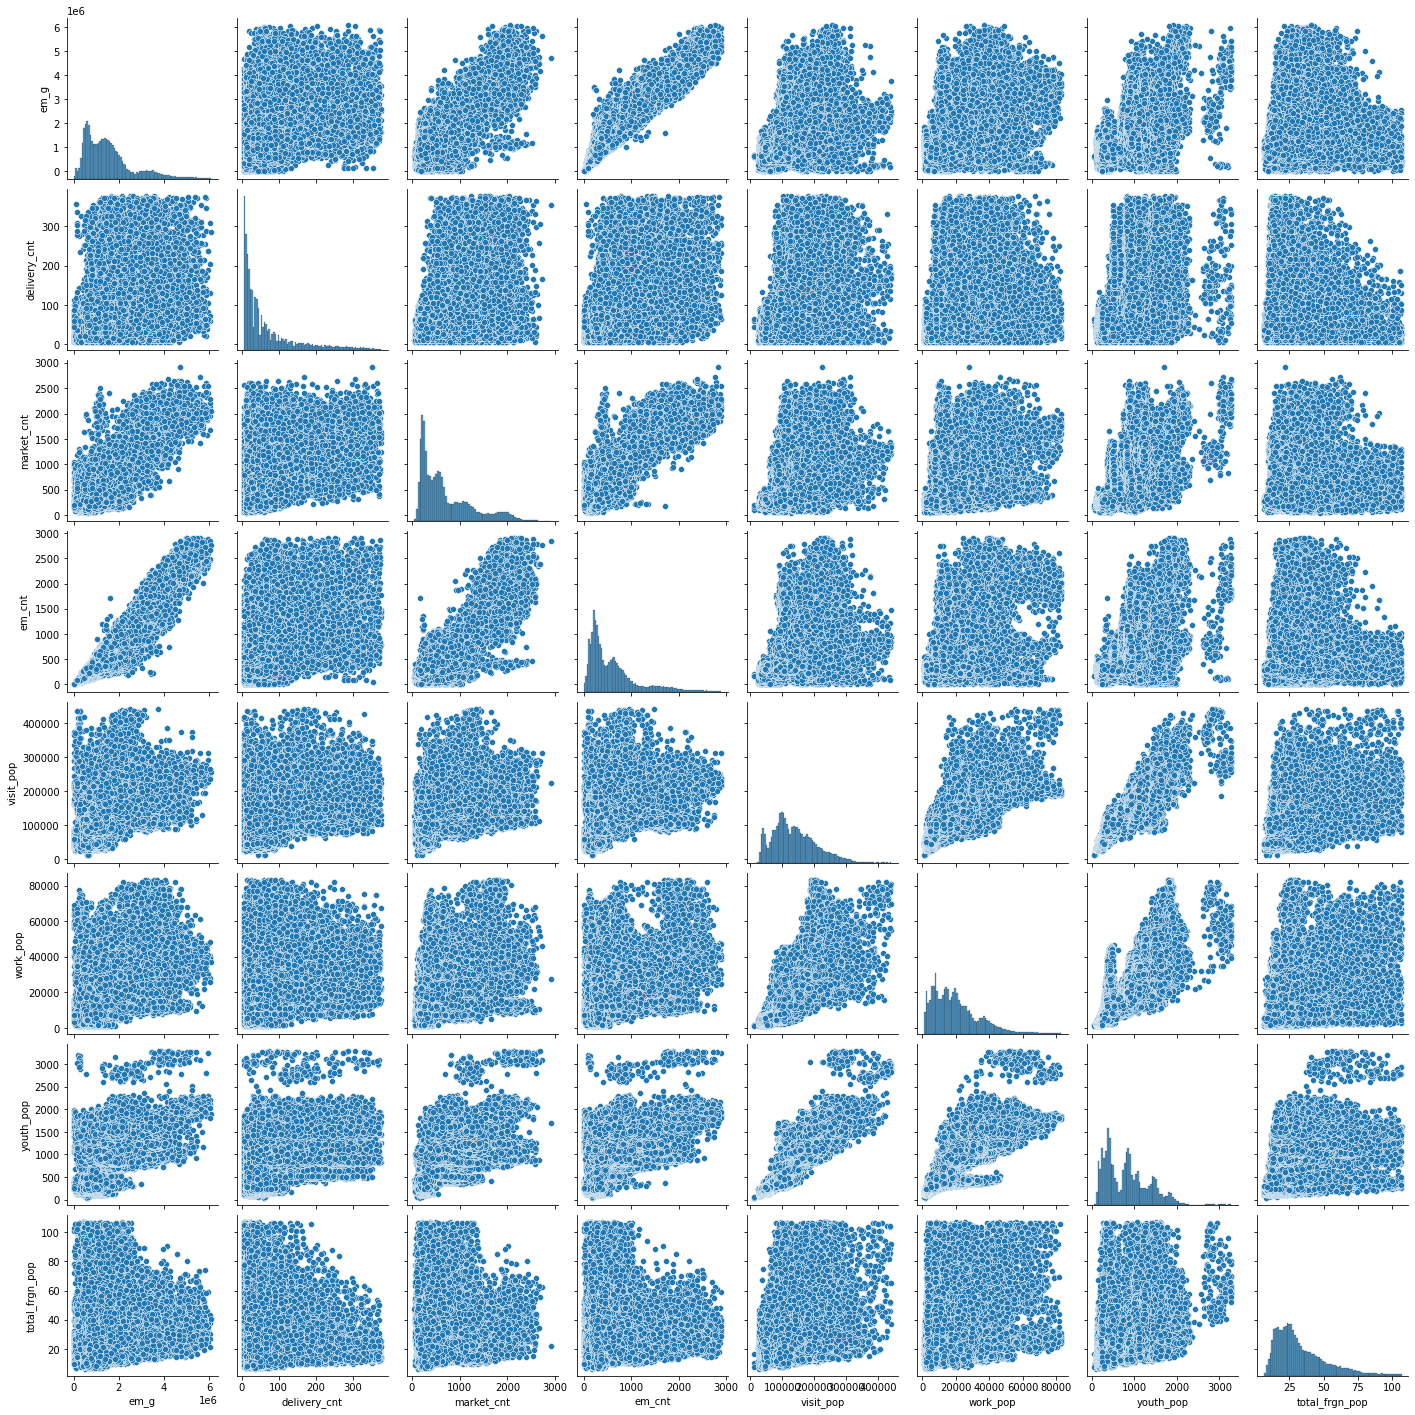

In [27]:
sns.pairplot(train_set_clean[['em_g','delivery_cnt', 'market_cnt', 'em_cnt', 'visit_pop', 'work_pop',
       'youth_pop', 'total_frgn_pop']])

### test/valid 분리

In [47]:
# feature/target 으로 분리

feature_df = train_set_clean.drop(['em_g'],axis =1)
target_df = train_set_clean[['em_g']]

# train/ valid로 분할
X_train, X_valid, y_train, y_valid = train_test_split(feature_df, target_df, test_size = 0.3, random_state = 45)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(27773, 16)
(27773, 1)
(11904, 16)
(11904, 1)


### modeling

In [49]:
model = RandomForestRegressor(n_estimators=100, min_samples_split=3)
model.fit(X_train, y_train)

C:\Users\UserK\AppData\Local\Temp/ipykernel_18516/262699967.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(min_samples_split=3)

#### result

In [50]:
# train_set 에 대한 성능

acc_t = model.score(X_train, y_train)
print("Train Set 성능 : ", acc_t)

# valid_est 에 대한 성능
acc_v = model.score(X_valid, y_valid)
print("Valid Set 성능 : " , acc_v)

Train Set 성능 :  0.9915700068616375
Valid Set 성능 :  0.9451692331269582


In [51]:
y_pred = model.predict(X_valid)
y_true = y_valid

mse = mean_squared_error(y_true, y_pred)
rmse = mse**0.5
print('mse:' , mse)
print('rmse:' , rmse)

mse: 62614683993.10137
rmse: 250229.2628632818


#### model 의 중요 변수

In [52]:
imp = model.feature_importances_
len(imp)

16

<BarContainer object of 16 artists>

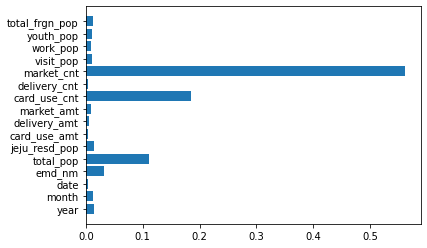

In [53]:
plt.barh(X_train.columns, imp)

#### grid search

In [69]:
rfr = RandomForestRegressor(random_state = 2021)

param_grid = {
    'n_estimators': [200 , 300],
    'max_depth' : [80, 85, 90],
    'max_leaf_nodes' : [300 , 400],
    'criterion' : ['mse']
} 

CV_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, cv=5, verbose=1, n_jobs= -1, scoring='r2')
CV_rfr.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2021),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [80, 85, 90],
                         'max_leaf_nodes': [300, 400],
                         'n_estimators': [200, 300]},
             scoring='r2', verbose=1)

In [63]:
best_rfr = CV_rfr.best_estimator_
best_rfr.fit(X_train, y_train)

y_valid_pred = best_rfr.predict(X_valid)

C:\Users\UserK\AppData\Local\Temp/ipykernel_18516/4197184552.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rfr.fit(X_train, y_train)


In [64]:
# r2score = r2_score(y_valid, y_valid_pred)
mse = mean_squared_error(y_valid, y_valid_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_valid, y_valid_pred)

print("Result ")
# print("R2 score : " , r2score)
print("MSE : " , mse)
print("RMSE : " ,rmse)
print("MAE: ", mae)

Result 
MSE :  73901819557.20273
RMSE :  271848.8910354477
MAE:  185640.15469903097


In [65]:
# train_set 에 대한 성능

acc_t = best_rfr.score(X_train, y_train)
print("Train Set 성능 : ", acc_t)

# valid_est 에 대한 성능
acc_v = best_rfr.score(X_valid, y_valid)
print("Valid Set 성능 : " , acc_v)

Train Set 성능 :  0.9513269713405668
Valid Set 성능 :  0.9352852528956144


In [66]:
best_rfr

RandomForestRegressor(max_depth=90, max_leaf_nodes=300, n_estimators=200,
                      random_state=2021)

#### feature importance

In [67]:
imp = best_rfr.feature_importances_
len(imp)

16

<BarContainer object of 16 artists>

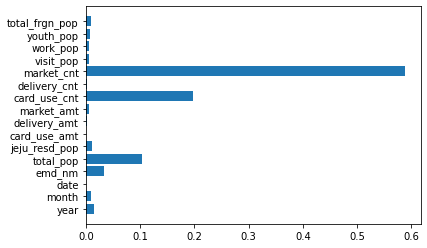

In [68]:
plt.barh(X_train.columns, imp)